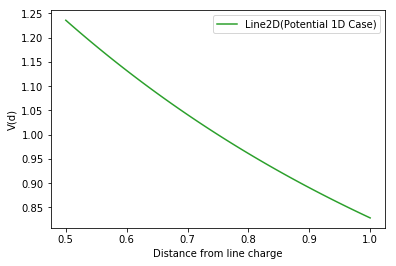

In [2]:
import numpy as np
from numpy import sqrt ,ones ,copy ,cos ,sin ,tan ,pi ,linspace ,array ,exp ,arange
from myint import * 
import scipy.integrate as sci

from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import plotly.figure_factory as ff


#//For 1D case: //
#Define a point along the x-axis and a distance d from the origin (x=0)
#Let
# k = 1/(4)*(np.pi*np.epsilon_0) or 1 
xp = np.linspace(0,1,100) 
d = np.linspace(0.5,1,100) #distance from the line charge
f=lambda xp: 2*xp/np.sqrt(y**2+xp**2) #In this case the electric potential
fvector = np.vectorize(f) #vectorize 
v = [] #empty list 
for i in d:
    f=lambda xp: 2*xp/np.sqrt(i**2+xp**2)
    v.append(sci.romberg(f,0,1)) 
#sci.romberg: Romberg integration of a callable function or method.
#Returns the integral of function (a function of one variable) over the interval (a, b).

p0, = plt.plot(d,v,'C2', label = "Potential 1D Case")
plt.legend([p0])
plt.xlabel('Distance from line charge')
plt.ylabel('V(d)')
plt.show()


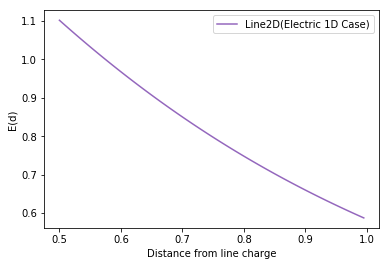

In [14]:
#// Electric Field //

# E is the (negative) grdient of potenital or first dierviative of it, since v is a vector or a list of numbers we can find derivative using np.diff
#np.diff Calculate the n-th discrete difference along the given axis
E1D=(-1)*(np.diff(v)/np.diff(d)) #d/dx potenital 

p1, = plt.plot(d[0:99],E1D, "C4", label = "Electric 1D Case") # since np.diff taking difference of two adjacent elements we end up with an n-1 element less than the entire range (n) so [0:99]
plt.legend([p1])
plt.xlabel('Distance from line charge')
plt.ylabel('E(d)')
plt.show()


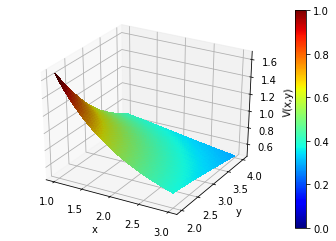

In [36]:
#//For 2D case: //
# An "L-shaped" two line charges along x and y axis using superposition principle: 
#the total electric potential is simply the sum of potentials due to individual charges.
import scipy.integrate as sci

x = np.linspace(1,3,50) 
y = np.linspace(2,4,50)
vx = np.zeros((len(x),len(y))) #creates an array with x shape filled with zeros 
vy = np.zeros ((len(x),len(y))) 
vtotal = np.zeros((len(x),len(y)))
 #// nested for loop to fill arrays since the 3d plotting has a different storing mechanism //  
for j in range (0,len(x)):
    for k in range (0,len(y)):
        fx=lambda xp: xp**2/np.sqrt((x[j]-xp)**2+(y[k]-1)**2) 
        fy=lambda yp: yp/np.sqrt(x[j]**2+(y[k]-yp)**2)
        vx[k,j] = sci.romberg(fx,0,1)
        vy[k,j] = sci.romberg(fy,1,2)
        vtotal [k,j] = vx [k,j]+ vy [k,j] #Superposition principle 
        


fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
my_col = cm.jet(vtotal/np.amax(vtotal))

surf = ax.plot_surface(X, Y, vtotal, rstride=1, cstride=1, facecolors = my_col,
        linewidth=0, antialiased=False)

m = cm.ScalarMappable(cmap=cm.jet)
#ax.set_zlim(-1.01, 1.01)
#fig.colorbar(surf, shrink=0.5, aspect=5)
m.set_array([])
fig.colorbar(m)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V(x,y)')
plt.show()


#/////////////////
# the gradient corresponds to the E-fields and I should be including the gradient to indicate the correct colors for the right values 



Text(0.5,1,'Contour plot of Potential')

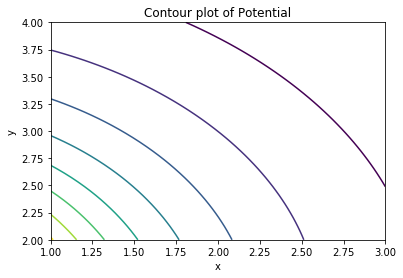

In [41]:
plt.contour(X,Y,vtotal)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour plot of Potential')

In [ ]:
# electric field for 2D case: 

Ex=-np.diff(vtotal,axis=1)/.1 #"axis -1 is out of bounds for array of dimension 0" error 
Ey=-np.diff(vtotal,axis=0)/.1
X, Y , ex, ey= np.meshgrid(x[0:50], y[0:50], Ex[0:50],Ey[0:50])

fig, ax = plt.subplots()
CS = ax.contour(X, Y, ex, ey)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Contour plot of Electric Field')

plt.show()



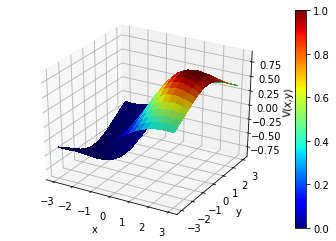

In [28]:
#// Potenital for a 2D case Disk in x-y plane with a raidus = 2 //

x=np.linspace(-3,+3,20)
y=np.linspace(-3,+3,20)
z=2
v=np.zeros((len(x),len(y)))
for l in range(0,len(x)):
    for n in range (0,len(y)):
        f=lambda r,t : cos(t)*r**2/np.sqrt((x[l]-r*cos(t))**2 + (y[n]-r*sin(t))**2 + z**2 )
        integral=sci.nquad(f,[[0,2],[0,2*pi]]) #sci.nquad: Wraps quad to enable integration over multiple variables 
        v[n,l]=integral[0]    
fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)

surf = ax.plot_surface(X, Y, v, rstride=1, cstride=1, facecolors = my_col,
        linewidth=0, antialiased=False)

my_col = cm.jet(v/np.amax(v))
m = cm.ScalarMappable(cmap=cm.jet)
#ax.set_zlim(-1.01, 1.01)
#fig.colorbar(surf, shrink=0.5, aspect=5)
m.set_array([])
fig.colorbar(m)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V(x,y)')
plt.show()
        
        

Text(0.5,1,'Contour plot of V(x,y,z=2)')

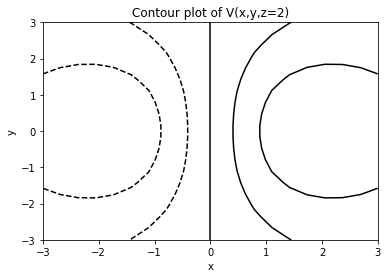

In [34]:
#// Electric field for a disk: ///
plt.contour(X,Y,v, 6,colors='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour plot of Potenital, z=2)')

                 